**MACHINE LEARNING USING PYTHON**
# MINI PROJECT----->PIMA INDIAN DIABETES DATABASE

Importing the dependencies

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm


Data Collection and Analysis

In [12]:
 # Loading the dataframe
 df=pd.read_csv('/content/drive/MyDrive/ML DS NOV2021 /diabetes.csv')

In [8]:
# printing the first 5 rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Number of rows and columns in the datasets
df.shape

(768, 9)

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [66]:
# slicing dataset into Input and Output
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [67]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
Standardized_data=scaler.transform(X)

In [24]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [58]:
X=Standardized_data
y=df['Outcome']

In [59]:
print(X,y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the Tarin Test 

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the datasets model

In [53]:
from sklearn.linear_model import LogisticRegression

In [85]:
logReg=LogisticRegression()

In [87]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [88]:
logReg.score(X_train,y_train)

0.7850162866449512

In [114]:
from sklearn.metrics import confusion_matrix,classification_report ,plot_confusion_matrix

In [89]:
predictions=logReg.predict(X_test)

In [90]:
cm=confusion_matrix(y_test,predictions)

In [91]:
cm

array([[89, 11],
       [26, 28]])

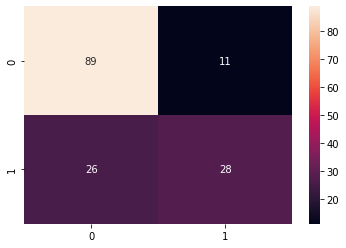

In [92]:
sns.heatmap(cm,annot=True)

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [44]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test,predictions)

0.7597402597402597